In [1]:
import sys
sys.path.append('/home/gergedan/WS24/thesis/code')

import numpy as np
import matplotlib.pyplot as plt
from draw import draw_1d

## **1-D Example**
### Here is the toy function that we want to approximate 

$$
  f(x) = \frac{x^{3}}{3} - \frac{x^{2}}{2} - \frac{1}{2} \cos{(x^{2})}
$$

$$
  \frac{\partial f(x)}{\partial x} = x^{2} - x + \sin{(x^{2})}x
$$

Where $x \in \mathbb{R}$ and $f(x) \in \mathbb{R}$ 

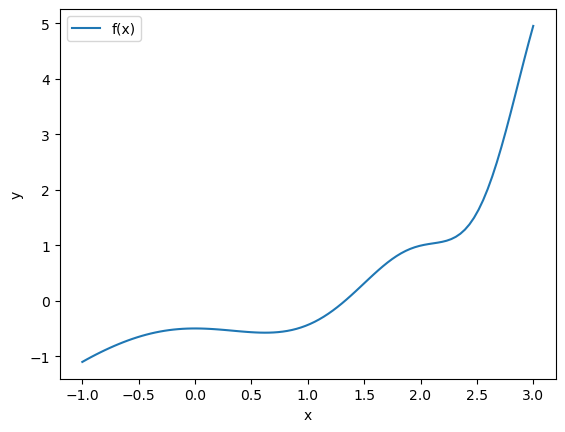

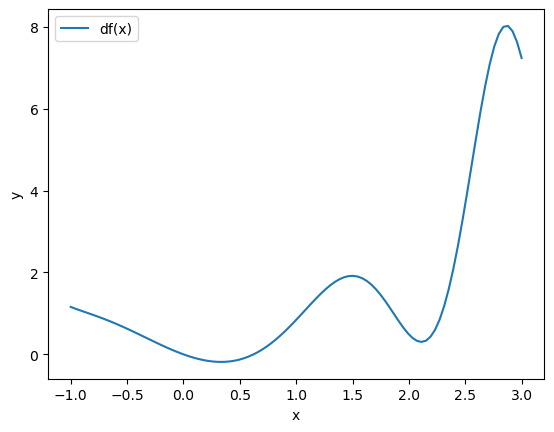

In [2]:
# one dimensional function that we want to approximate as a toy example
def f(x):
    return (x**3)/3 - (x**2)/2 - (1/2)*np.cos(x**2)
def df(x):
    return x**2 - x + np.sin(x**2)*x

N = 100
x = np.linspace(-1, 3, N)
y = f(x)
dx = df(x)

draw_1d(x, y)
draw_1d(x, dx, label='df(x)')

## **Approximation Least Squares**

### In the following we always assume that we know the following dataset: $D = \{x_i, dx_i\}_{i = 1}^{K}$ where $dx_i = \frac{df(x)}{dx}(x_i)$ and also the value $f_0 = f(x_0)$ at a single point $x_0 \in \mathbb{R}$,

### and we want to be able to approximate $f(x)$ at any $x\ \in \mathbb{R}$, i.e. learn the mapping $f(x)$.

In [3]:
# Sample training dataset
K = 7
x_train_values = np.linspace(-1, 3, K)
x_train_derivs = df(x_train_values)
x0 = np.array([0])
f0 = f(x0)

# Sample points that we want to predict
N = 20
x_predict = np.linspace(-1, 3, N)

### If we use a single Linear layer with $M$ neurons with no activation, which takes the input $x$ and should output $f(x)$ for $x \in \mathbb{R}$, then we can set this up as a system of linear equations for the weights and solve it, since maximizing the likelihood of the weights is same?? as minimizing the least squares error function. 

### Since we assume we know the derivatives, we can set up the following system:

### Solving a system of $K$ linear equations with $M$ unkowns defined as $\sum_{j=1}^{M}(w_j x_i) = \hat{f}(x_i) \approx f(x_i)$, taking the derivative w.r.t $x$ we get: $\sum_{j=1}^{M}(w_j) = \frac{d\hat{f}(x)}{dx}(x_i) \approx \frac{df(x)}{dx}(x_i)$ which gives us the following system:

$$ w_1 + w_2 + \,...\, + w_M = \frac{d\hat{f}(x)}{dx}(x_1) $$
$$ w_1 + w_2 + \,...\, + w_M = \frac{d\hat{f}(x)}{dx}(x_2) $$
$$ ... $$
$$ w_1 + w_2 + \,..\, + w_M = \frac{d\hat{f}(x)}{dx}(x_K) $$

which is solving the linear system of equations of $A \, w = \frac{d\hat{f}(x)}{dx}(X)$ for $w$ where $A \in \mathbb{R}^{K \times M}$, $w \in \mathbb{R}^{K}$ and $\frac{d\hat{f}(x)}{dx}(X) \in \mathbb{R}^{K}$ 

$$
A \, w = 
\begin{bmatrix} 1 & 1 & ... & 1 \\ 1 & 1 & ... & 1 \\ \vdots & \vdots & & \vdots \\ 1 & 1 & ... & 1 \end{bmatrix}
\begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_M \end{bmatrix} = \begin{bmatrix} \frac{d\hat{f}(x)}{dx}(x_1) \\ \frac{d\hat{f}(x)}{dx}(x_2) \\ \vdots \\ \frac{d\hat{f}(x)}{dx}(x_K) \end{bmatrix}
$$

### We also assume we know an intial value $f_0$ at $x_0$ so we add this linear equation as well. Overall we have the following formulation which we can solve for $w$:

### $$ A \, w = \begin{bmatrix} 1 & 1 & ... & 1 \\ 1 & 1 & ... & 1 \\ \vdots & \vdots & & \vdots \\ 1 & 1 & ... & 1 \\ x_0 & x_0 & ... & x_0 \end{bmatrix} \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_M \end{bmatrix} = \begin{bmatrix} \frac{d\hat{f}(x)}{dx}(x_1) \\ \frac{d\hat{f}(x)}{dx}(x_2) \\ \vdots \\ \frac{d\hat{f}(x)}{dx}(x_K) \\ f_0 \end{bmatrix} $$

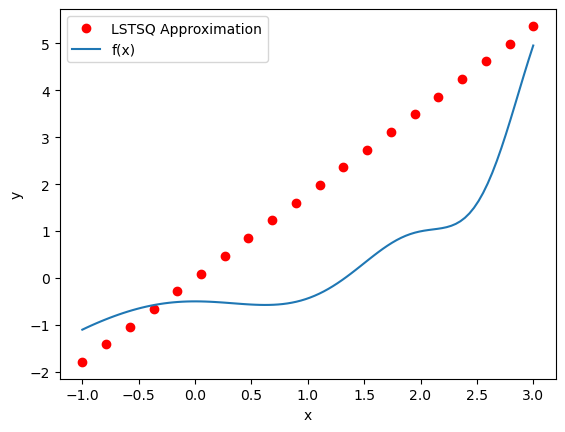

In [4]:
regularization_scale = 1e-8 # for the lstsq
M = 10 # number of hidden nodes, for values >0 it doesn't change the approximation since they add up to a constant anyway?

# setup a linear system to approximate the weights: A*w=b
A = np.ones(shape=(K,M))
A = np.vstack([A, np.ones(shape=(M))*x0])
b = np.append(x_train_derivs, f0)

w = np.linalg.lstsq(A, b, rcond=regularization_scale)[0]
def f_lstsqApprox(x):
    return np.tile(x, (M, 1)).T @ w

fx_lstsq_predict = f_lstsqApprox(x_predict)

draw_1d(x, y, xpredict=x_predict, ypredict=fx_lstsq_predict, labelpredict='LSTSQ Approximation')